<h3>Сейчас мы проанализируем датасет из преступлений, совершённых в чикаго с 2001 года.</h3>

Мы разберём несколько интересных вопросов:
1) Какое самое частое преступление?
2) Какой процент аррестованных?
3) Где чаще всего происходят преступления?
4) В какое время совершается больше всего преступлений?
5) В каком году произошло больше всего преступлений?
6) Какие районы самые криминальные?

Для более понятной иллюстрации я буду визуализировать данные в каждом из пунктов.

Установим нужные библиотеки

In [4]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy

In [5]:
# Подключим нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
import warnings

In [6]:
warnings.filterwarnings('ignore')

# Для полноценной работы со строками мы отредактируем ограничение строк и столбцов в отображении
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 20)

# Прочитаем базу и начнём подготавливать её для анализа
data = pd.read_csv("Crimes_-_2001_to_Present.csv", delimiter=",")

data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN


<h3>Предобработка данных</h3>

In [7]:
# Избавимся от дубликатов
data.drop_duplicates()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11449702,JB373031,07/31/2018 01:30:00 PM,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,...,5.0,41.0,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
3,11643334,JC209972,12/19/2018 04:30:00 PM,056XX W WELLINGTON AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,31.0,19.0,14,NaN,NaN,2018,04/04/2019 04:16:11 PM,NaN,NaN,NaN
4,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7846804,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,07/15/2023 04:45:57 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
7846805,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,07/15/2023 04:45:57 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
7846806,13128066,JG325838,06/06/2023 03:42:00 PM,018XX N LOCKWOOD AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,APARTMENT,False,False,...,37.0,25.0,17,1140792.0,1911954.0,2023,07/15/2023 04:45:57 PM,41.914487,-87.758185,"(41.914487492, -87.758185241)"
7846807,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,07/15/2023 04:45:57 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"


In [8]:
# Удалим не нужные нам столбцы
data = data.drop(columns=["Case Number", "Block", "IUCR", "Beat", "FBI Code", "X Coordinate", "Y Coordinate", "Latitude", "Longitude",
                         "Ward", "Community Area", "Location"])
data.head()

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Updated On
0,11646166,09/01/2018 12:01:00 AM,THEFT,OVER $500,RESIDENCE,False,True,6.0,2018,04/06/2019 04:04:43 PM
1,11645836,05/01/2016 12:25:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,8.0,2016,04/06/2019 04:04:43 PM
2,11449702,07/31/2018 01:30:00 PM,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,2.0,2018,04/09/2019 04:24:58 PM
3,11643334,12/19/2018 04:30:00 PM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,25.0,2018,04/04/2019 04:16:11 PM
4,11645527,02/02/2015 10:00:00 AM,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,8.0,2015,04/06/2019 04:04:43 PM


In [9]:
# Узнает размер таблицы
data.shape

(7846809, 10)

In [10]:
# Отобразим названия колонок
list(data.columns)

['ID',
 'Date',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'District',
 'Year',
 'Updated On']

In [11]:
# Переименуем наши колонки
data.rename(columns = {
    "Date": "Дата",
    "Primary Type": "Тип преступления",
    "Description": "Описание",
    "Location Description": "Место преступления",
    "Arrest": "Арестован",
    "Domestic": "Внутреннее",
    "District": "Район",
    "Community Area": "Общественная зона",
    "Year": "Год",
    "Updated On": "Обновлёная дата",
    "Location": "Местоположение"
}, inplace = True)

In [12]:
list(data.columns)

['ID',
 'Дата',
 'Тип преступления',
 'Описание',
 'Место преступления',
 'Арестован',
 'Внутреннее',
 'Район',
 'Год',
 'Обновлёная дата']

In [13]:
# Проверка и обработка пропущенных значений
# Проверим количество пропусков и посчитаем их сумму
data.isnull().sum()

ID                        0
Дата                      0
Тип преступления          0
Описание                  0
Место преступления    10758
Арестован                 0
Внутреннее                0
Район                    47
Год                       0
Обновлёная дата           0
dtype: int64

In [14]:
# Заполним преступления без района нулём и описание места пустой строкой
values = {"Описание места": "Unknown",
          "Район": 0}
data = data.fillna(value=values)
data.isnull().sum()

ID                        0
Дата                      0
Тип преступления          0
Описание                  0
Место преступления    10758
Арестован                 0
Внутреннее                0
Район                     0
Год                       0
Обновлёная дата           0
dtype: int64

<h3>Проверка и обработка типов данных</h3>

In [15]:
# Проверяем типы столбцов
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7846809 entries, 0 to 7846808
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ID                  int64  
 1   Дата                object 
 2   Тип преступления    object 
 3   Описание            object 
 4   Место преступления  object 
 5   Арестован           bool   
 6   Внутреннее          bool   
 7   Район               float64
 8   Год                 int64  
 9   Обновлёная дата     object 
dtypes: bool(2), float64(1), int64(2), object(5)
memory usage: 493.9+ MB


In [16]:
# Изменим тип данных
data['Район'] = data['Район'].astype(int)

data["Дата"] = pd.to_datetime(data["Дата"], format="%m/%d/%Y %I:%M:%S %p")
data["Обновлёная дата"] = pd.to_datetime(data["Обновлёная дата"], format="%m/%d/%Y %I:%M:%S %p")
data['Время'] = data['Дата'].dt.time
data['Час'] = data['Дата'].dt.hour
data['Месяц'] = data['Дата'].dt.month_name()
data['День недели'] = data['Дата'].dt.day_name()
data['Номер дня недели'] = data['Дата'].dt.day

data.head()

data.dtypes

ID                             int64
Дата                  datetime64[ns]
Тип преступления              object
Описание                      object
Место преступления            object
Арестован                       bool
Внутреннее                      bool
Район                          int32
Год                            int64
Обновлёная дата       datetime64[ns]
Время                         object
Час                            int32
Месяц                         object
День недели                   object
Номер дня недели               int32
dtype: object

<h3>Исследовательский анализ данных</h3>

<b>Приступим в первому интересуещему нас вопросу: Какое самое частое преступление?</b>

In [17]:
primaries_count = data.groupby("Тип преступления").size().reset_index(name="Количество преступлений").sort_values(by="Количество преступлений",
                                                                                                                  ascending=False)
primaries_count.head(10)

,Тип преступления,Количество преступлений
34,THEFT,1655523
2,BATTERY,1433696
6,CRIMINAL DAMAGE,894469
19,NARCOTICS,748757
1,ASSAULT,512777
26,OTHER OFFENSE,487246
3,BURGLARY,426115
18,MOTOR VEHICLE THEFT,382245
9,DECEPTIVE PRACTICE,349195
31,ROBBERY,294608


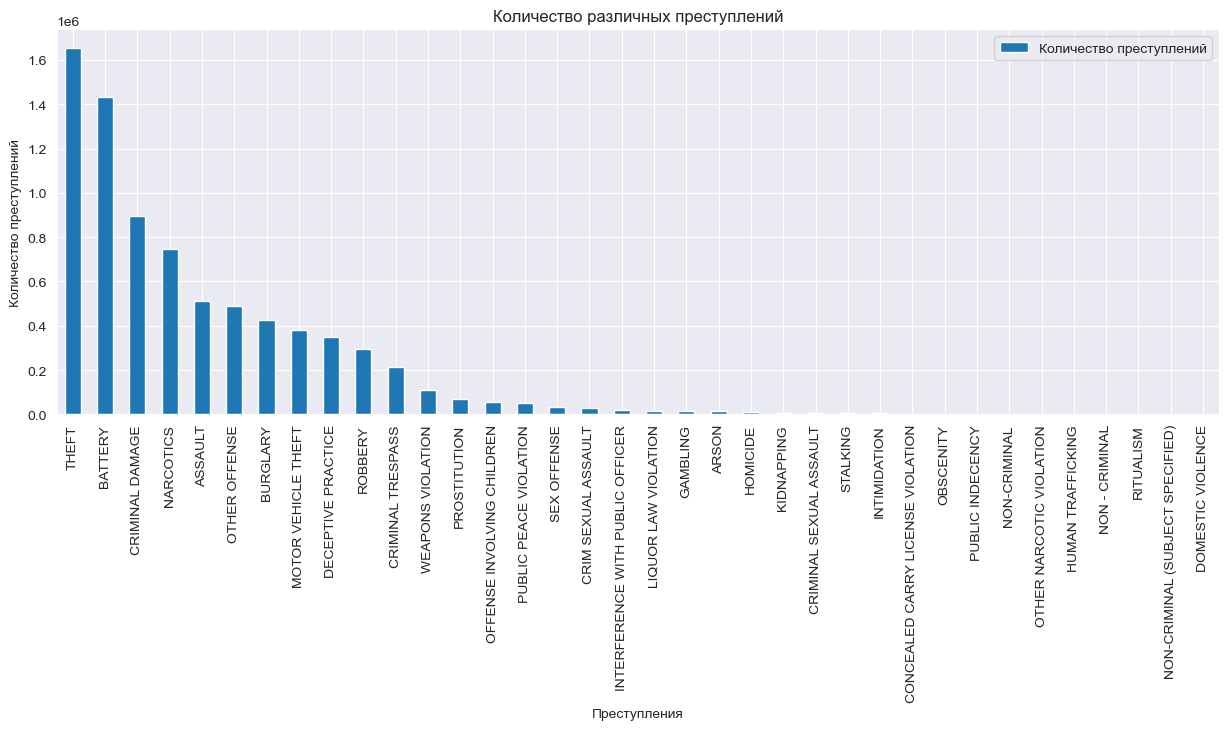

In [18]:
# Построим гистограмму
primaries_count.plot(x = "Тип преступления",
                     y = "Количество преступлений",
                     kind = 'bar',
                     figsize=(15,5),
                     title="Количество различных преступлений")

# Меняем наименование горизонтальной линии "X"
plt.xlabel("Преступления")
# Меняем наименование вертикальной линии "Y"
plt.ylabel("Количество преступлений")

plt.show()

Здесь можно заметить, что самым частым преступлением является THEFT (кража).

<b>Перейдём ко второму вопросу: Какой процент арестованных?</b>

In [19]:
# Посчитаем процент арестованных
arrested = data["Арестован"].value_counts()
arrested

Арестован
False    5804567
True     2042242
Name: count, dtype: int64

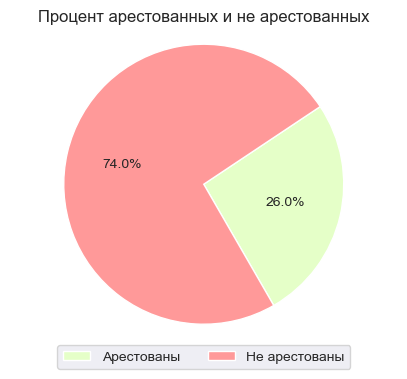

In [20]:
# Построим круговую диаграму
percentage_arrested = (arrested[True] / arrested.sum()) * 100
percentage_not_arrested = (arrested[False] / arrested.sum()) * 100

sizes = [percentage_arrested, percentage_not_arrested]
labels = ["Арестованы", "Не арестованы"]
colors = ["#e5ffc8", "#ff9999"]

plt.figure(figsize=(5, 4), dpi=100)
plt.pie(sizes,
        colors=colors,
        autopct='%1.1f%%', 
        startangle=300)

plt.axis("equal")
plt.title("Процент арестованных и не арестованных")
plt.legend(labels=labels, loc='upper center', 
           bbox_to_anchor=(0.5, 0), ncol=2)

plt.show()

Итого, процент арестованных оказался меньше, чем процент не арестованных.

<b>Пора узнать, где чаще всего происходят преступления?</b>

In [21]:
# Возьмём только те места, в которых совершено больше 30000 преступлений
locations_primes = data.groupby("Место преступления").size().reset_index(name="Количество преступлений").sort_values(by="Количество преступлений",
                                                                                                                  ascending=True)
locations_primes = locations_primes.loc[locations_primes["Количество преступлений"] > 30000]
locations_primes.head(10)

,Место преступления,Количество преступлений
182,"SCHOOL, PUBLIC, GROUNDS",30253
78,CTA TRAIN,30953
23,BANK,31375
85,DRUG STORE,36068
36,CHA APARTMENT,39083
73,CTA PLATFORM,39649
25,BAR OR TAVERN,42991
46,CHA PARKING LOT/GROUNDS,56107
145,PARK PROPERTY,59178
62,COMMERCIAL / BUSINESS OFFICE,61180


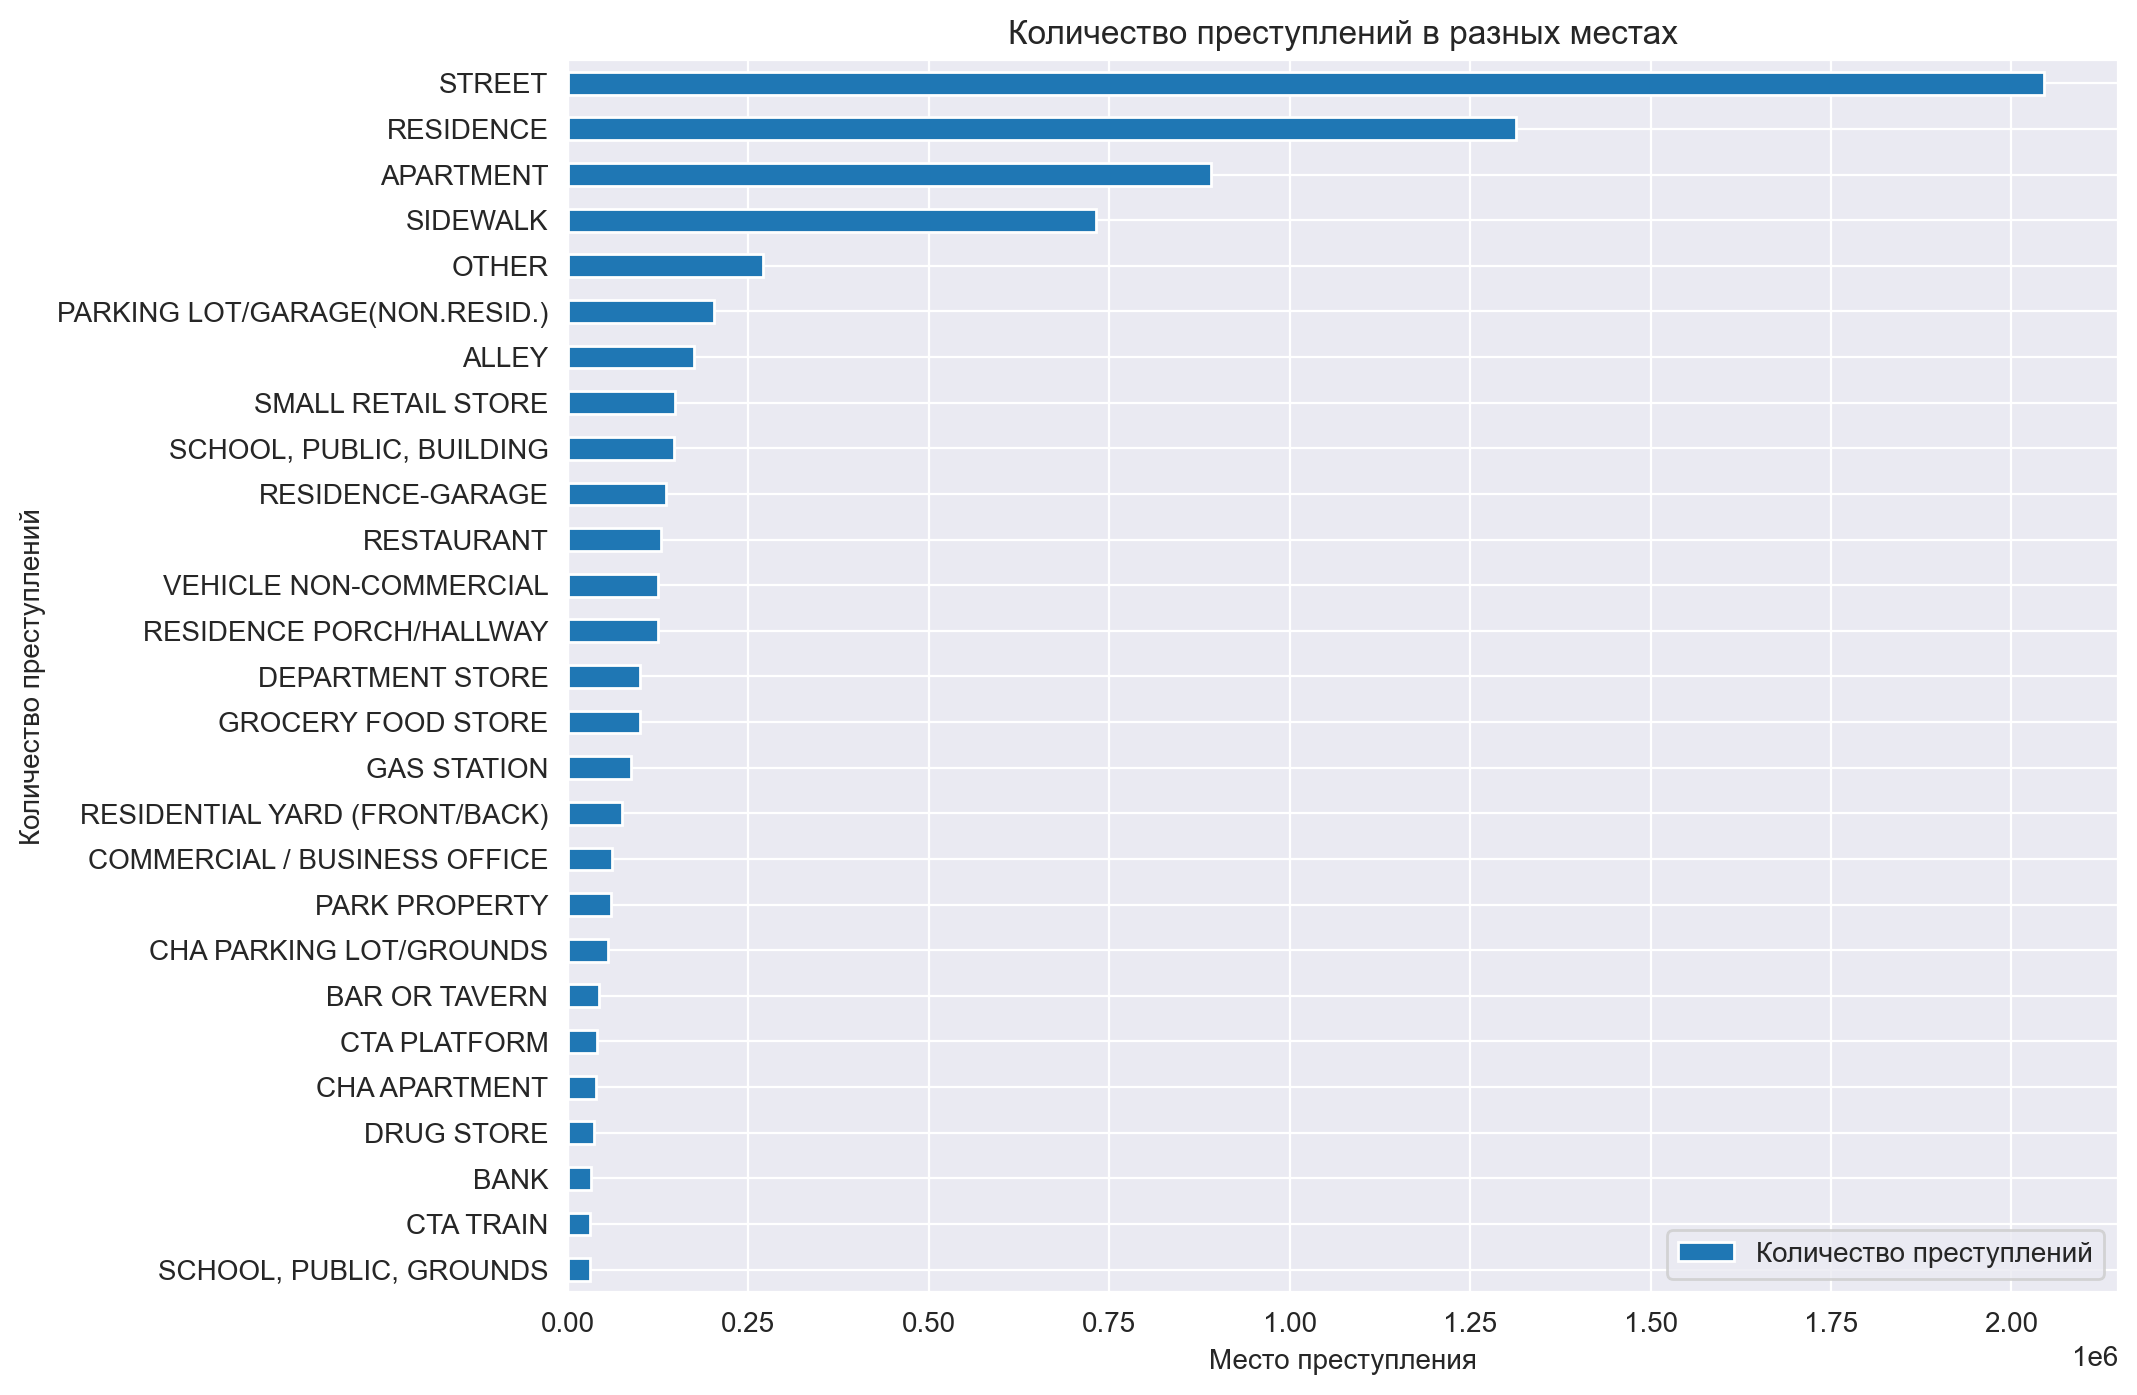

In [22]:
# Построим гистограмму
plt.rcParams["figure.dpi"] = 200
locations_primes.plot(x = "Место преступления",
                     y = "Количество преступлений",
                     kind = 'barh',
                     figsize=(10, 8),
                     title="Количество преступлений в разных местах",)

# Меняем наименование горизонтальной линии "X"
plt.xlabel("Место преступления")
# Меняем наименование вертикальной линии "Y"
plt.ylabel("Количество преступлений")

plt.show()

Получается, что чаще всего преступления совершаются на улице, в местах жительства и квартирах.

<b>Итак, в какое время совершается больше всего преступлений?</b>

In [23]:
# Посчитаем, сколько было совершено преступлений за каждый час
primary_times = data.groupby("Час").size().reset_index(name="Количество преступлений").sort_values(by="Час", 
                                                                                                   ascending=True)
primary_times

,Час,Количество преступлений
0,0,448942
1,1,248942
2,2,210013
3,3,169974
4,4,129340
...,...,...
19,19,441584
20,20,439993
21,21,426640
22,22,419789


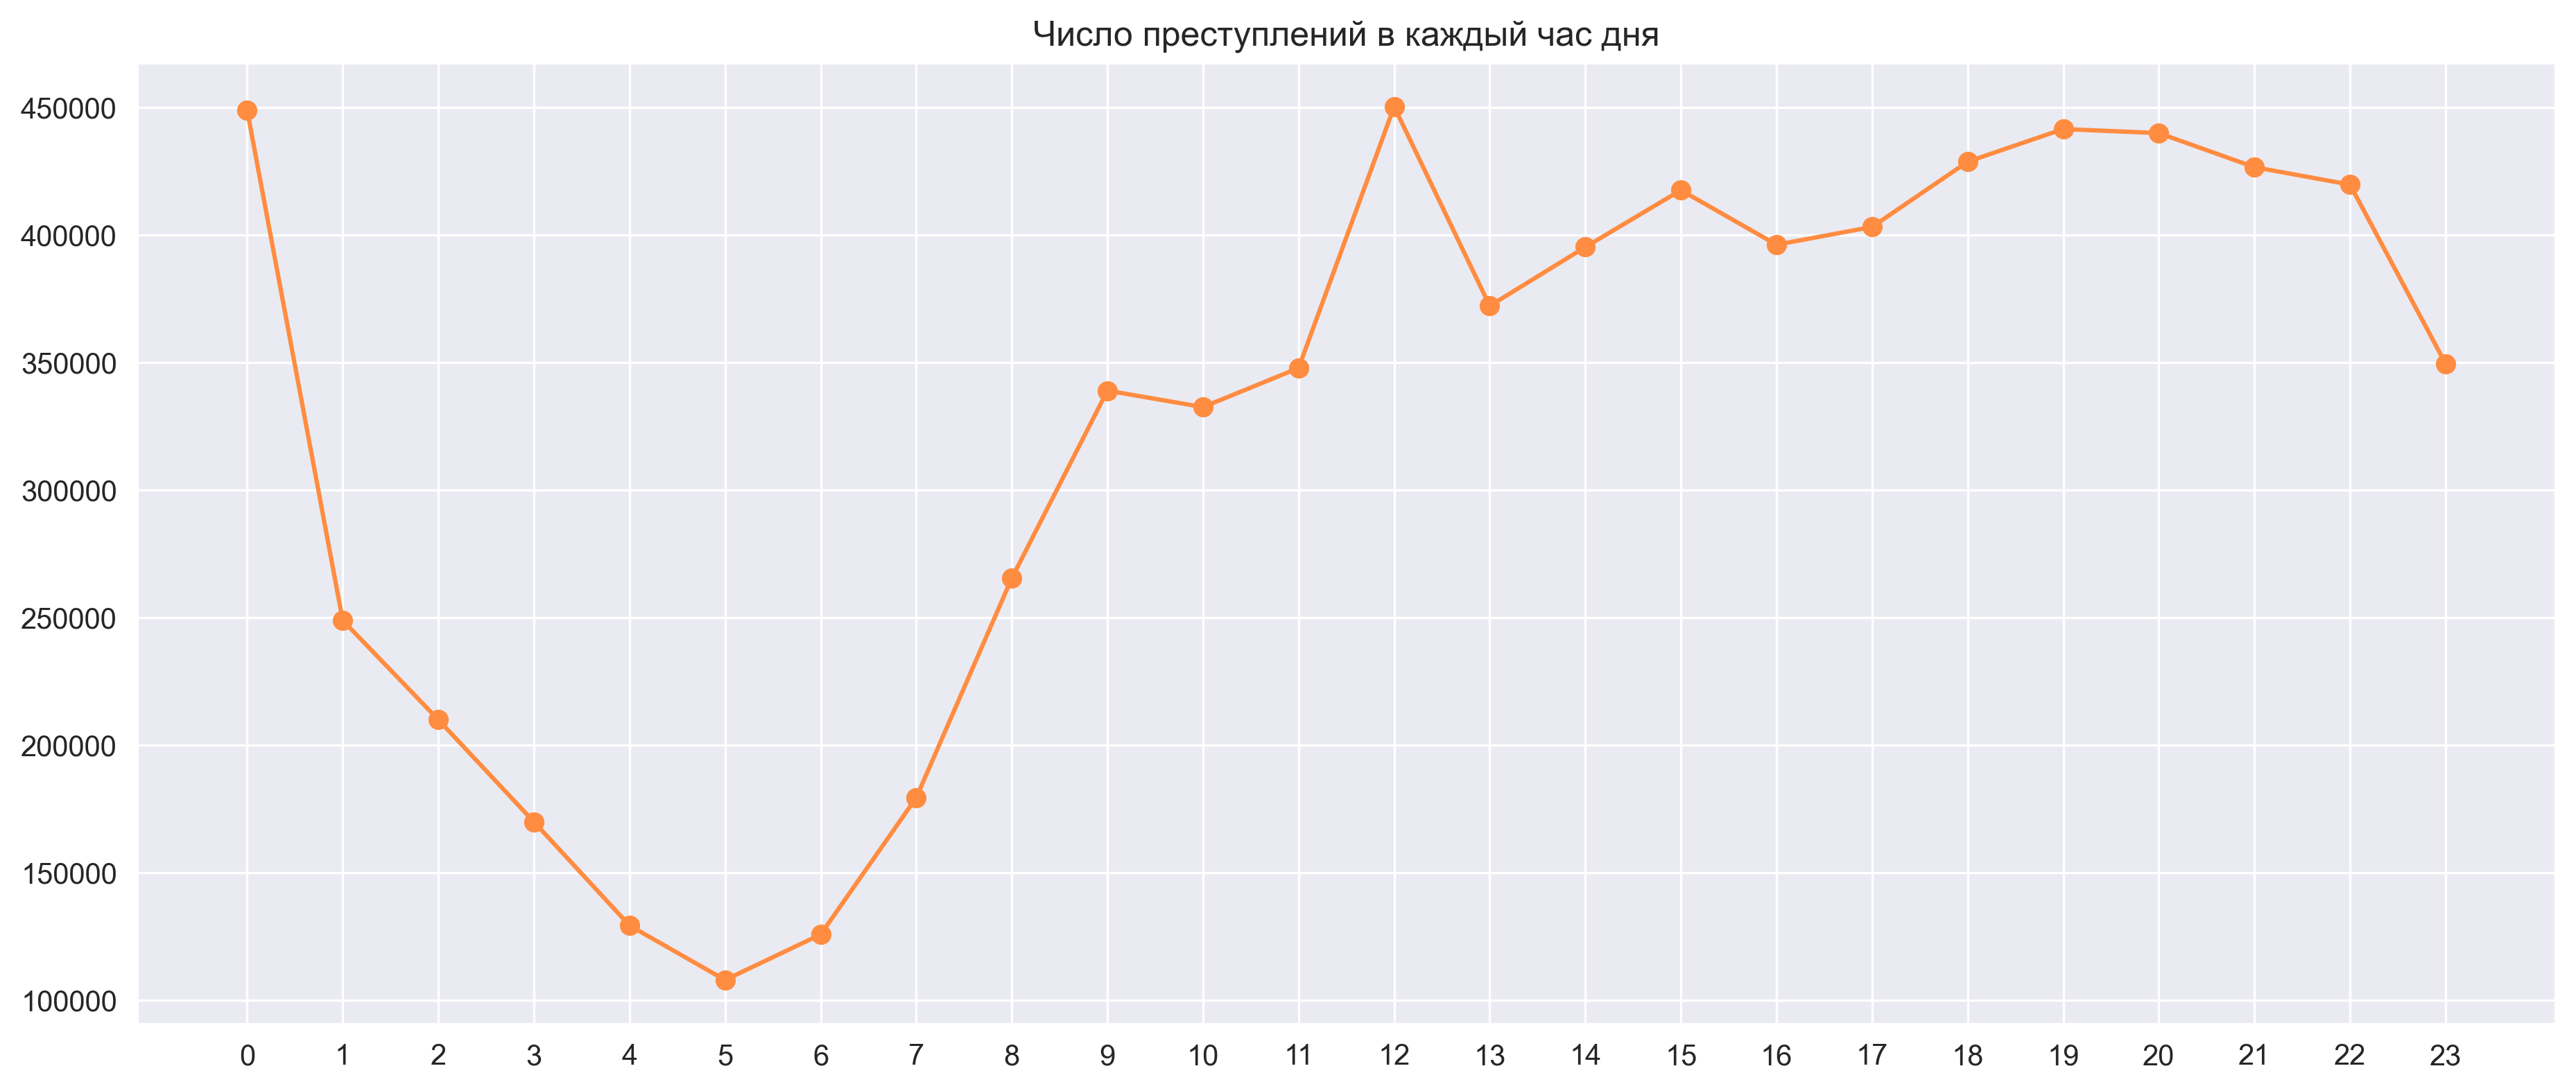

In [24]:
# Построим график
plt.figure(figsize=(15, 6), dpi=300)
plt.plot(primary_times["Час"],
         primary_times["Количество преступлений"],
         marker="o",
         color="#ff8c40")

plt.xticks(range(0, 24))
plt.title("Число преступлений в каждый час дня")

plt.show()

Можно сделать вывод, что самым безопасным временем можно считать со 01:00 по 08:00. Самым опасным же является промежуток времени с 12:00 по 01:00.

<b>И последний вопрос: В каком году произошло больше всего преступлений?</b>

In [25]:
# Посчитаем, сколько было совершено преступлений за каждый год
primary_years = data.groupby("Год").size().reset_index(name="Количество преступлений").sort_values(by="Год", 
                                                                                                   ascending=True)
primary_years

,Год,Количество преступлений
0,2001,485885
1,2002,486805
2,2003,475983
3,2004,469421
4,2005,453772
...,...,...
18,2019,261290
19,2020,212170
20,2021,208733
21,2022,238712


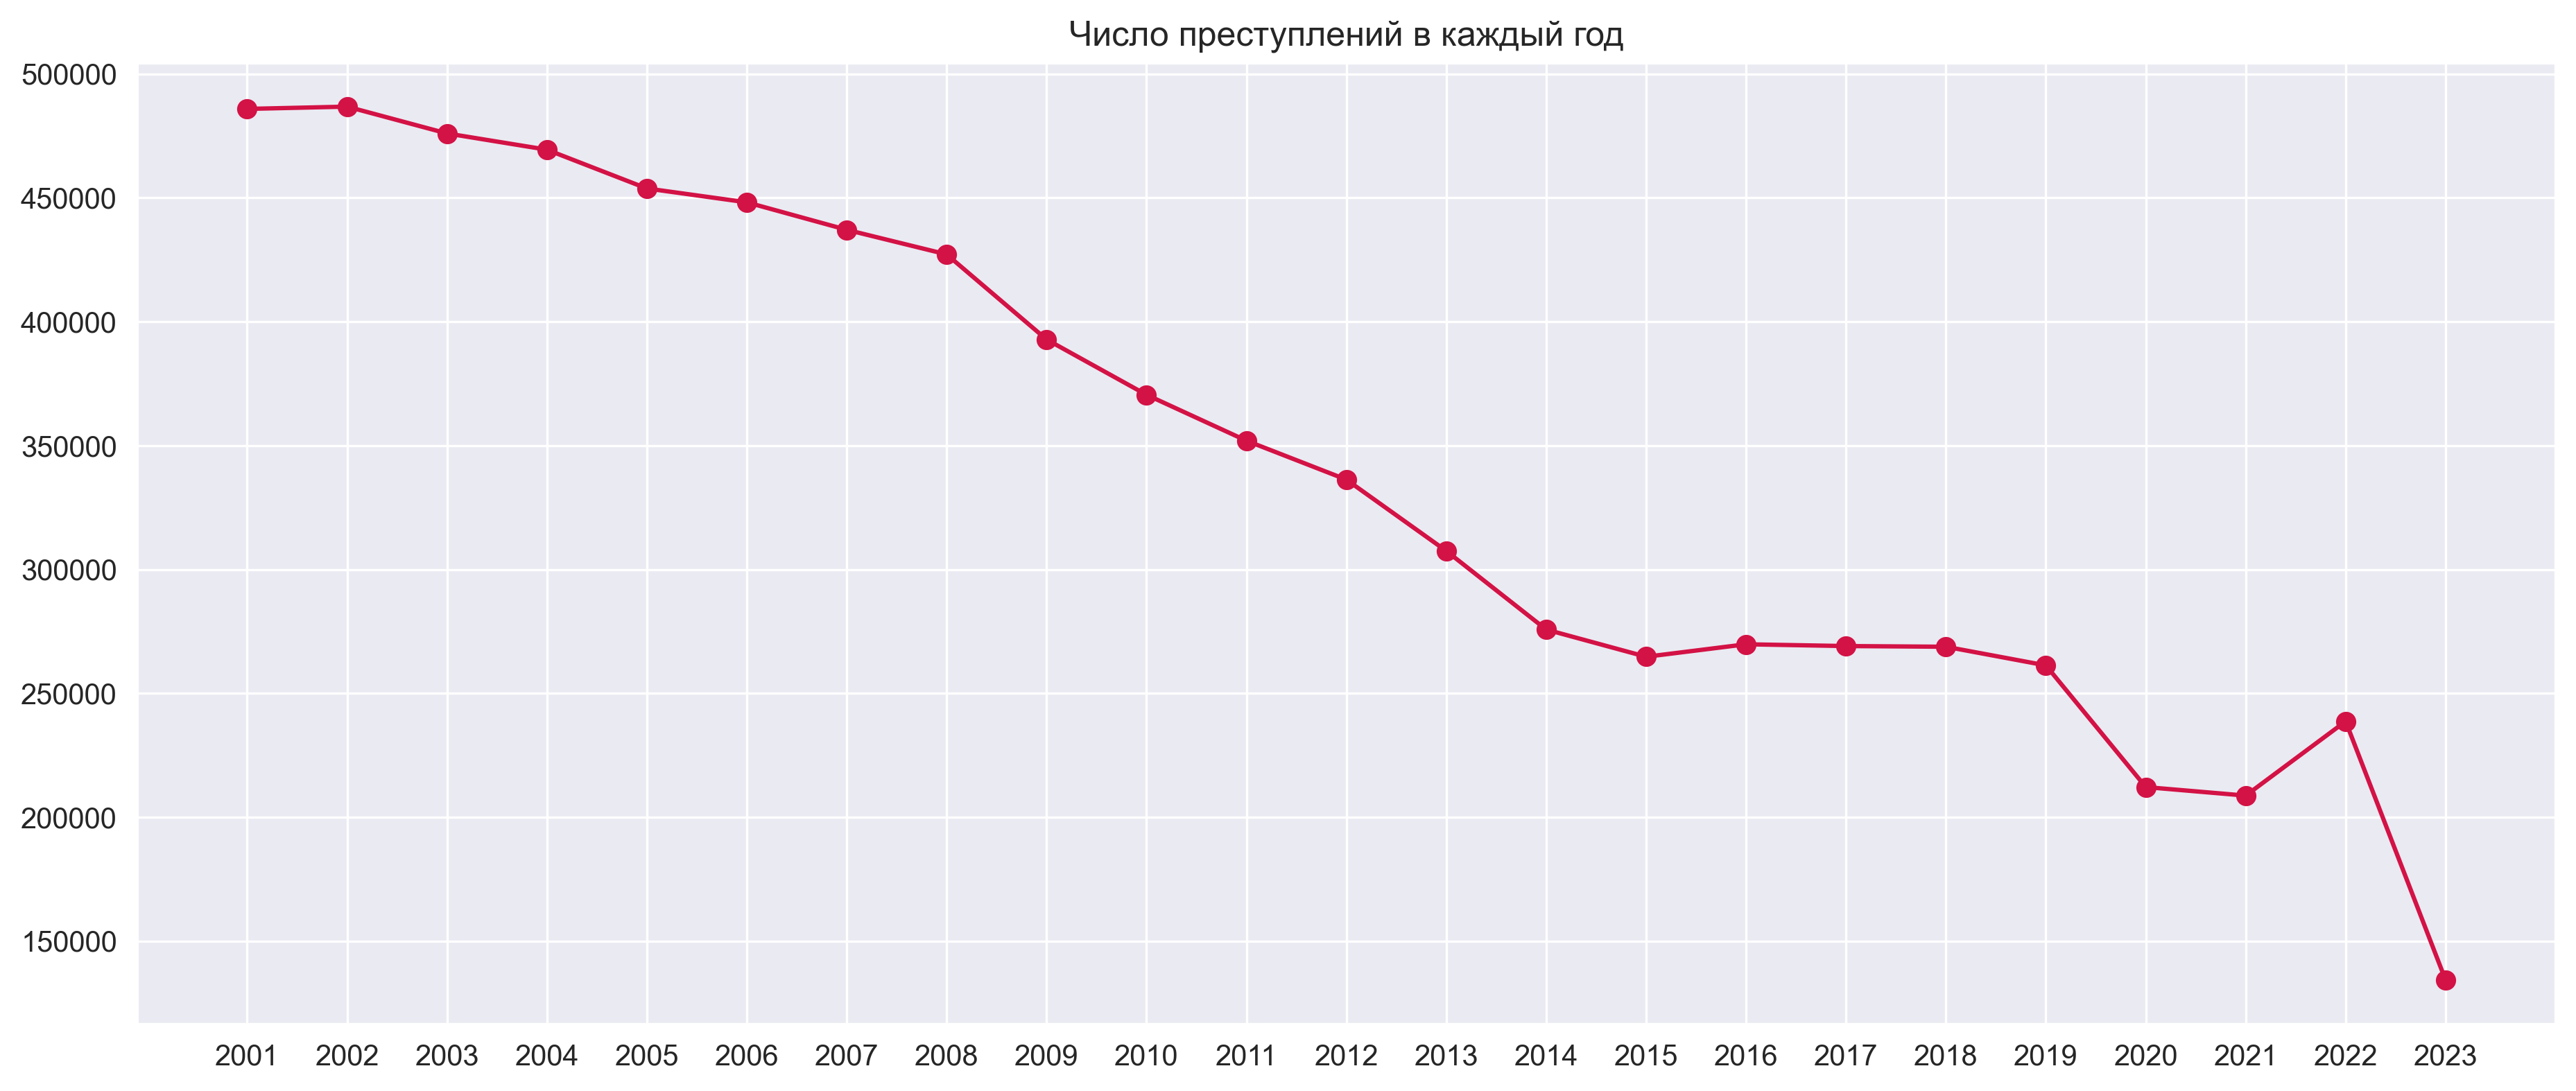

In [29]:
# Построим график
plt.figure(figsize=(15, 6), dpi=300)
plt.plot(primary_years["Год"],
         primary_years["Количество преступлений"],
         marker="o",
         color="#d31245")

plt.xticks(range(2001, 2023 + 1))
plt.title("Число преступлений в каждый год")

plt.show()

Мы можем увидить, что самым криминальным был 2002 год. Однако преступность очень заментно снизилась за последние 20 лет.

<b>Посмотрим, какие районы самые криминальные</b>

In [27]:
district_primes = data.groupby("Район").size().reset_index(name="Количество преступлений").sort_values(by="Количество преступлений",
                                                                                                      ascending=False)
district_primes = district_primes[district_primes["Район"] > 0]
district_primes

,Район,Количество преступлений
8,8,527069
11,11,503309
6,6,458932
7,7,453078
23,25,446215
...,...,...
22,24,237272
16,17,226463
19,20,138889
24,31,245


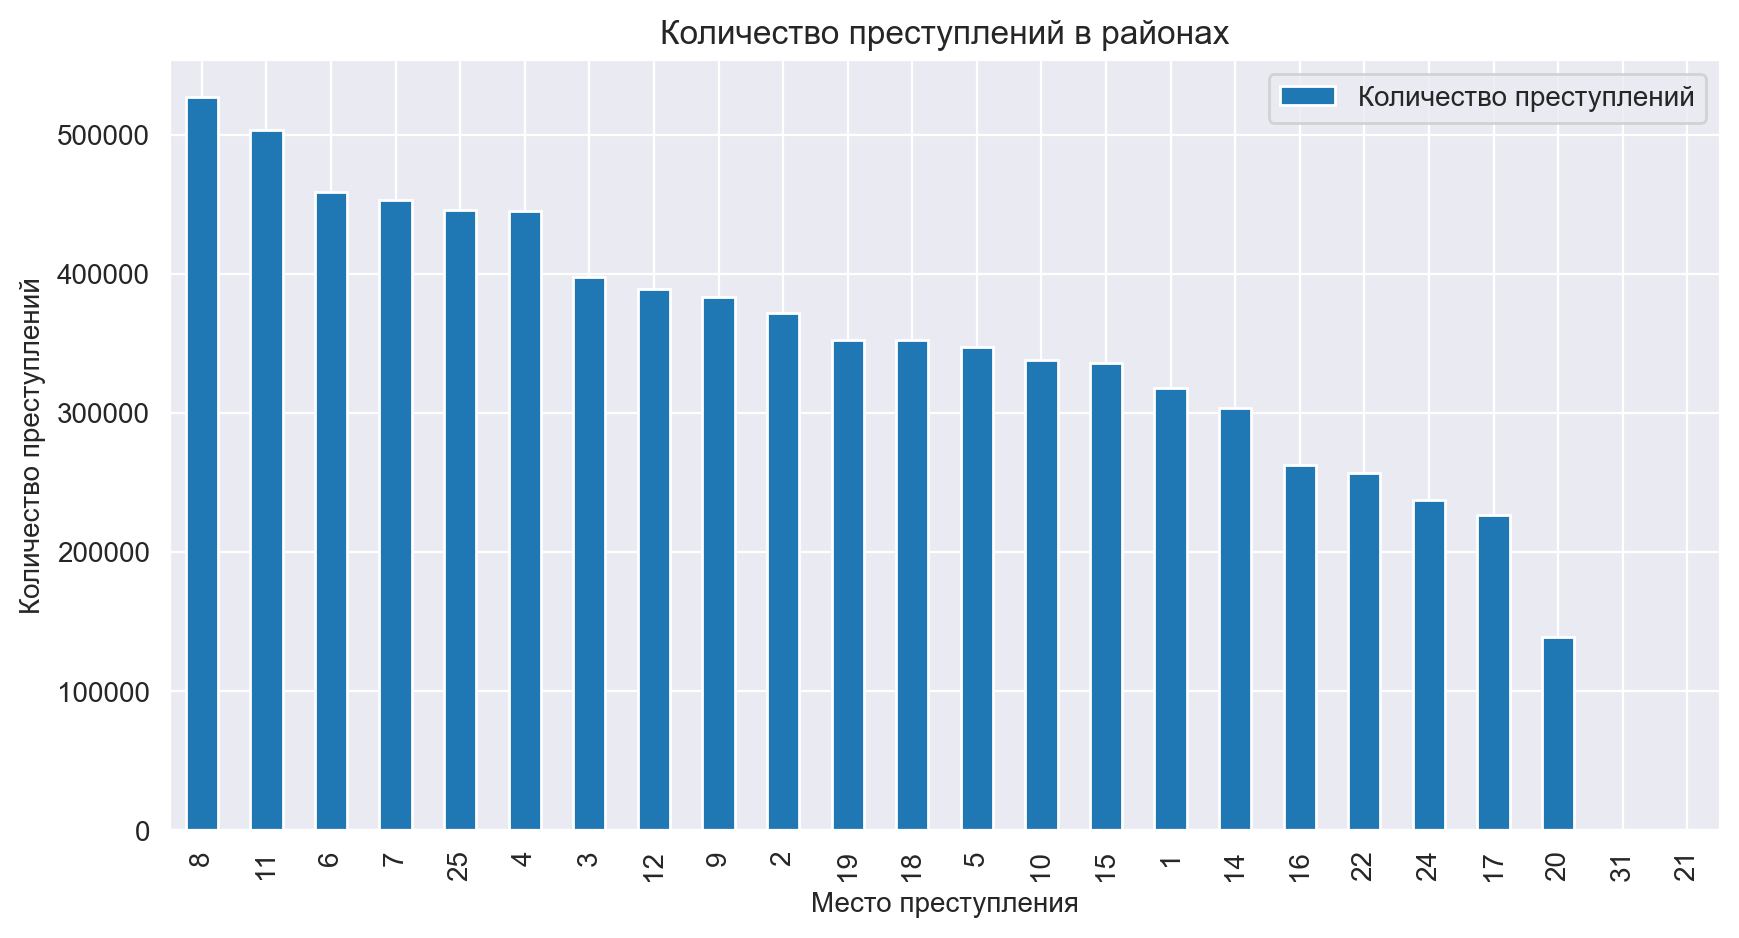

In [28]:
# Построим гистограмму
plt.rcParams["figure.dpi"] = 200
district_primes.plot(x = "Район",
                     y = "Количество преступлений",
                     kind = 'bar',
                     figsize=(10, 5),
                     title="Количество преступлений в районах",)

# Меняем наименование горизонтальной линии "X"
plt.xlabel("Место преступления")
# Меняем наименование вертикальной линии "Y"
plt.ylabel("Количество преступлений")

plt.show()

Самым криминальный районом является 8-й (Нир-Норт-Сайд), 11-й (Джефферсон-Парк) и 6-й (Лейквью).